# Trabalho Final de Fundamentos de Machine Learning

Alunos:
*   Gian Giovanni Rodrigues da Silva
*   Jessyca Jordanna Barroso de Moraes
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves



## Sobre o Dataset

Com base nas características das observações, o conjunto de dados foi criado em uma máquina virtual, baseado em Unix / Linux, para fins de classificação de malwares. Este conjunto de dados consiste em 100.000 dados de observação e 35 atributos, sendo 50.000 classificados como *malware* e o restante como *benign* (benigno). O mesmo foi disponibilizado na plataforma Kaggle. As especificações e descrições do dataset se encontram abaixo:

Atributos -> Descrição

* hash -> APK/ SHA256 file name
* milisecond -> Time
* classification -> Malware/Benign
* state -> Sinalização de tarefas não executáveis ​​/ executáveis ​​/ interrompidas
* usage_counter -> Contador de uso da estrutura da tarefa
* prio -> Mantém a prioridade dinâmica de um processo
* static_prio -> Prioridade estática de um processo
* normal_prio -> Prioridade sem levar em consideração a herança RT
* policy -> Política de planejamento do processo
* vm_pgoff -> O deslocamento da área no arquivo, em páginas
* vm_truncante_count -> Usado para marcar uma vma como agora tratada
* task_size -> Tamanho da tarefa atual
* cached_hole_size -> Tamanho do orifício do espaço de endereço livre
* free_area_cache -> Primeiro buraco no espaço de endereço
* mm_users -> Usuários do espaço de endereço
* map_count -> Número de áreas de memória
* hiwater rss -> Pico do tamanho do conjunto residente
* total_vm -> Número total de páginas
* shared_vm -> Número de páginas compartilhadas
* exec_vm -> Número de páginas executáveis
* reserved_vm -> Número de páginas reservadas
* nr_ptes -> Número de entradas da tabela de página
* end_data -> Endereço final do componente de código
* last_interval -> Último intervalo de tempo antes de thrashing
* nvcsw -> Número de trocas de contexto voluntárias
* nivcsw -> Número de mudanças de contexto voluntárias
* min_flt -> Falhas mínimas de página
* maj_flt -> Falhas máximas de página
* fs_excl_counter -> Contém recursos exclusivos do sistema de arquivos
* lock -> Bloqueio de sincronização de leitura e gravação usado para acesso ao sistema de arquivos
* utime -> Tempo do usuário
* stime -> Hora do sistema
* gtime -> Tempo de convidado
* cgtime -> Tempo cumulativo do grupo
* signal_nvcsw -> Usado como contador de recurso cumulativo

## Bibliotecas e Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib import colors as mcolors
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df_original = pd.read_csv('/content/drive/Shareddrives/Fundamentos machine learning/dataset/malware_detection.csv')
df_original.head() 

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


## Tratamento de Dados

Nesta seção, é realizada uma verificação da necessidade de discretização, eliminação de duplicatas e tratamento de dados faltantes.

In [51]:
df = df_original.copy()

In [52]:
df["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

Faz-se necessária a conversão de dados na coluna `classification`: `benign` se torna 0 e, `malware` se torna 1.

In [53]:
df['classification'] = df.classification.map({'benign':0, 'malware':1})
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [54]:
benign1 = df.loc[df['classification']=='benign']
benign1["classification"].head()

Series([], Name: classification, dtype: int64)

In [55]:
malware1 = df.loc[df['classification']=='malware']
malware1["classification"].head()

Series([], Name: classification, dtype: int64)

###Verificação de Dados Faltantes

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  int64 
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

De acordo com as informações acima, o dataset possui 100000 instâncias, onde duas colunas são strings e as trinta e três restantes são numéricas (`int64`).

Todas as colunas possuem 100000 linhas não nulas, ou seja, o dataset não possui valores faltantes.

###Verificação de Dados Duplicados

In [57]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [hash, millisecond, classification, state, usage_counter, prio, static_prio, normal_prio, policy, vm_pgoff, vm_truncate_count, task_size, cached_hole_size, free_area_cache, mm_users, map_count, hiwater_rss, total_vm, shared_vm, exec_vm, reserved_vm, nr_ptes, end_data, last_interval, nvcsw, nivcsw, min_flt, maj_flt, fs_excl_counter, lock, utime, stime, gtime, cgtime, signal_nvcsw]
Index: []


Com a informação apresentada acima, o dataset escolhido não possui dados duplicados. 

##Análise de Correlação de Features

Análise atribuída aos valores das colunas originais (não discretizadas) do dataset escolhido. 

In [58]:
corr = df.corr()
corr.nlargest(35,'classification')["classification"]

classification       1.000000
prio                 0.110036
last_interval        0.006952
min_flt              0.003070
millisecond          0.000000
gtime               -0.014416
stime               -0.042037
free_area_cache     -0.051237
total_vm            -0.059291
state               -0.064702
mm_users            -0.093641
reserved_vm         -0.118608
fs_excl_counter     -0.137883
nivcsw              -0.143791
exec_vm             -0.255123
map_count           -0.271227
static_prio         -0.317941
end_data            -0.324954
maj_flt             -0.324954
shared_vm           -0.324954
vm_truncate_count   -0.354861
utime               -0.369931
nvcsw               -0.386889
Name: classification, dtype: float64

In [59]:
df_corr = df.copy()

In [60]:
corr = df_corr.corr()
corr.nlargest(35, 'classification')["classification"]

classification       1.000000
prio                 0.110036
last_interval        0.006952
min_flt              0.003070
millisecond          0.000000
gtime               -0.014416
stime               -0.042037
free_area_cache     -0.051237
total_vm            -0.059291
state               -0.064702
mm_users            -0.093641
reserved_vm         -0.118608
fs_excl_counter     -0.137883
nivcsw              -0.143791
exec_vm             -0.255123
map_count           -0.271227
static_prio         -0.317941
end_data            -0.324954
maj_flt             -0.324954
shared_vm           -0.324954
vm_truncate_count   -0.354861
utime               -0.369931
nvcsw               -0.386889
Name: classification, dtype: float64

In [61]:
df_matrix = df_corr.copy()
df_matrix.drop(['usage_counter', 'normal_prio', 'policy', 'vm_pgoff', 'task_size', 'cached_hole_size',
                'hiwater_rss', 'nr_ptes', 'lock', 'cgtime', 'signal_nvcsw'], axis = 1, inplace = True)

In [62]:
df_matrix = df_matrix.corr()

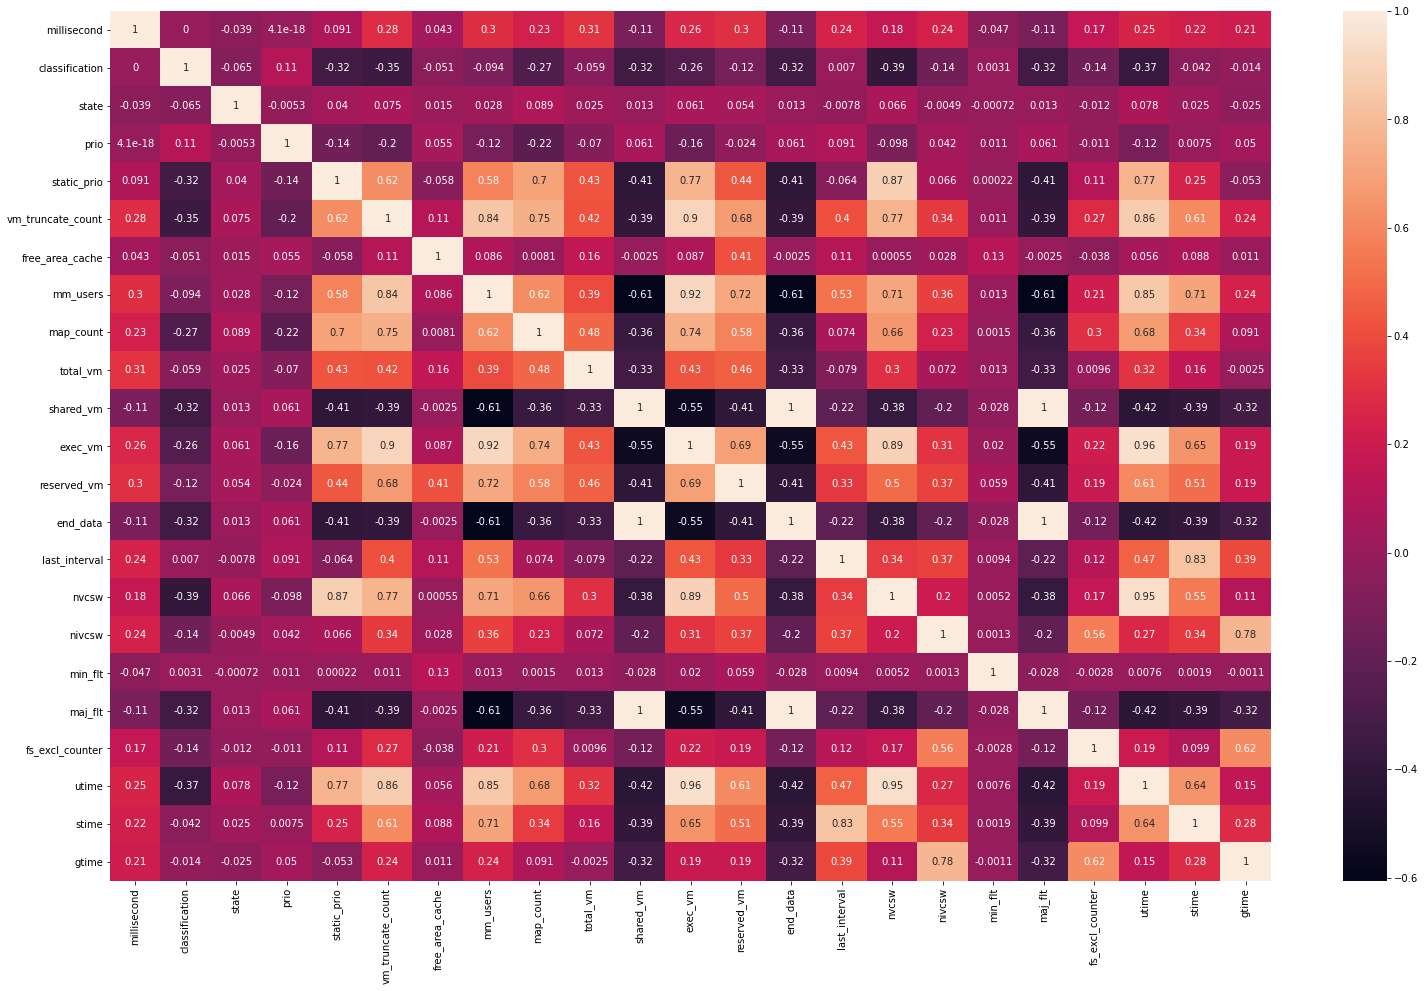

In [63]:
# Usando o método heatmap do seaborn
plt.figure(figsize = (26, 16))
sns.heatmap(data = df_matrix, annot = True);

In [64]:
df_matrix.nlargest(5, 'classification')

,millisecond,classification,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,shared_vm,exec_vm,reserved_vm,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
classification,0.000000e+00,1.000000,-0.064702,1.100359e-01,-0.317941,-0.354861,-0.051237,-0.093641,-0.271227,-0.059291,-0.324954,-0.255123,-0.118608,-0.324954,0.006952,-0.386889,-0.143791,0.003070,-0.324954,-0.137883,-0.369931,-0.042037,-0.014416
prio,4.125287e-18,0.110036,-0.005297,1.000000e+00,-0.137493,-0.197176,0.054707,-0.120580,-0.218144,-0.069935,0.060631,-0.163386,-0.024324,0.060631,0.090890,-0.098285,0.042366,0.010503,0.060631,-0.010575,-0.115542,0.007504,0.049742
last_interval,2.443287e-01,0.006952,-0.007847,9.089022e-02,-0.063590,0.404753,0.112068,0.527548,0.073957,-0.079146,-0.215687,0.433682,0.330837,-0.215687,1.000000,0.342107,0.367316,0.009442,-0.215687,0.116246,0.467248,0.834799,0.390922
min_flt,-4.685419e-02,0.003070,-0.000722,1.050294e-02,0.000217,0.010717,0.126070,0.013050,0.001496,0.013003,-0.028448,0.019996,0.059010,-0.028448,0.009442,0.005220,0.001289,1.000000,-0.028448,-0.002834,0.007598,0.001860,-0.001136
millisecond,1.000000e+00,0.000000,-0.038708,4.125287e-18,0.091229,0.284907,0.043046,0.295915,0.228902,0.310384,-0.108636,0.264458,0.298526,-0.108636,0.244329,0.177025,0.240078,-0.046854,-0.108636,0.167288,0.249216,0.222714,0.208772


## Divisão do Dataset

De acordo com as informações apresentadas na seção anterior, as *features* com correlação mais altas/positivas são `prio`, `last_interval`, `min_flt`e `millisecond`. Portanto, somente estas farão parte da predição.

In [65]:
x = df[['prio', 'last_interval', 'min_flt', 'millisecond']]
y = df["classification"] #feature target

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Algoritmo KNN

Primeiramente foi realizada uma simples análise do melhor valor *k*.

In [67]:
k = 15  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)
print("Acurácia do modelo com k = 15 é",accuracy_score(y_test, Pred_y))

Acurácia do modelo com k = 15 é 0.9871666666666666


In [68]:
k = 9  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)
print("Acurácia do modelo com k = 9 é",accuracy_score(y_test, Pred_y))

Acurácia do modelo com k = 9 é 0.987


In [69]:
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)
print("Acurácia do modelo com k = 5 é",accuracy_score(y_test, Pred_y))

Acurácia do modelo com k = 5 é 0.9902333333333333


`k = 5` é tradicionalmente adotado quando se trata da técnica KNN. Para este trabalho, foi adotado o `k = 5`, pois sua acurária é maior que `k = 9` e `k = 15`.

A seguir, foi implementado um modelo simples do KNN. 

In [70]:
modelKNeighbors = KNeighborsClassifier(n_neighbors=5)
modelKNeighbors.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
y_pred_knn = modelKNeighbors.predict(x_test)
y_pred_knn

array([0, 1, 0, ..., 0, 0, 0])

In [72]:
predictionsKNeighbors = modelKNeighbors.predict(x)
predictionsKNeighbors

array([1, 1, 1, ..., 1, 1, 1])

## Algoritmo Decision Tree


In [73]:
modelDecisionTree = tree.DecisionTreeClassifier().fit(x_train, y_train)

In [74]:
y_pred_dec_tree = modelDecisionTree.predict(x_test)
y_pred_dec_tree

array([0, 1, 0, ..., 0, 0, 0])

In [75]:
predictionsDecisionTree = modelDecisionTree.predict(x)
predictionsDecisionTree

array([1, 1, 1, ..., 1, 1, 1])

## Algoritmo Random Forest


In [76]:
modelRandomForest = RandomForestClassifier()
modelRandomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y_pred_rand_forest = modelRandomForest.predict(x_test)
y_pred_rand_forest

array([0, 1, 0, ..., 0, 0, 0])

In [78]:
predictionsRandomForest = modelRandomForest.predict(x)
predictionsRandomForest

array([1, 1, 1, ..., 1, 1, 1])

## Resultado

Para verificar os *scores* gerais, foi utilizada a função `classification_report()`, do Scikit-Learn.

In [79]:
target_names = ['benign', 'malware']

In [80]:
report_knn = classification_report(y_test, y_pred_knn, digits=5, target_names=target_names)
print('KNN:\n', report_knn)

KNN:
               precision    recall  f1-score   support

      benign    0.99180   0.98870   0.99025     15050
     malware    0.98866   0.99177   0.99022     14950

    accuracy                        0.99023     30000
   macro avg    0.99023   0.99024   0.99023     30000
weighted avg    0.99024   0.99023   0.99023     30000



In [82]:
report_dec_tree = classification_report(y_test, y_pred_dec_tree, digits=5, target_names=target_names)
print('Decision Tree:\n', report_dec_tree)

Decision Tree:
               precision    recall  f1-score   support

      benign    0.99615   0.99674   0.99645     15050
     malware    0.99672   0.99612   0.99642     14950

    accuracy                        0.99643     30000
   macro avg    0.99643   0.99643   0.99643     30000
weighted avg    0.99643   0.99643   0.99643     30000



In [84]:
report_rand_forest = classification_report(y_test, y_pred_rand_forest, digits=5, target_names=target_names)
print('Random Forest:\n', report_rand_forest)

Random Forest:
               precision    recall  f1-score   support

      benign    0.99708   0.99714   0.99711     15050
     malware    0.99712   0.99706   0.99709     14950

    accuracy                        0.99710     30000
   macro avg    0.99710   0.99710   0.99710     30000
weighted avg    0.99710   0.99710   0.99710     30000

